In [1]:
%%capture
! pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached triton-2.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached triton-2.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (168.1 MB)
  Created wheel for grad-cam: filename=grad_cam-1.5.3-py3-none-any.whl size=38657 sha256=e985431724894873ba826677990407de34229350c360fde3979faf1c2745e077
  Stored in directory: /home/guillermo/.cache/pip/wheels/2e/ce/70/fe64f851895eae830b3c63ec7fc464cfa7c81aeb7ad4f68063
Successfully built grad-cam
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling 

Model loaded successfully for inference
FOLD 2
-------------------------------


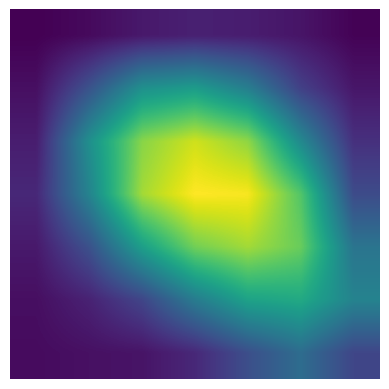

In [56]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import numpy as np 
import torch
from networks import resnet, vit
import matplotlib.pyplot as plt
from pytorch_grad_cam.utils.image import show_cam_on_image
# import cv2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the model status from checkpoint
model = resnet(n_channels=1, num_classes=1, fine_tune='full')  
checkpoint = torch.load('resnet_16_full_0001/8eolahko_checkpoint.pth', map_location=device, weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])
# model.load_state_dict(checkpoint)
for param in model.parameters():
    param.requires_grad = True
model = model.to(device)
model.eval()
print("Model loaded successfully for inference")

from make_dataset import get_data
from utils import make_transforms

transforms = make_transforms(True)
data = get_data(transform=make_transforms(False), normalize=True, slices=10, fold=2)

idx = 12

target_layers = [model.layer4[-1]] # una antes del GAP
# input_tensor = data[0][0][0].repeat(3, 1, 1).unsqueeze(0).to(device)
input_tensor = data[1][idx][0].unsqueeze(0).to(device)

# Construct the CAM object once, and then re-use it on many images:
# cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device.type == 'cuda')
cam = GradCAM(model=model, target_layers=target_layers)

# Define the target (if using BCE with a single output, just use 0)
# targets = [ClassifierOutputTarget(0)]
targets = None

# Generate the CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
plt.imshow(np.transpose(grayscale_cam, (1,2,0)))
plt.axis('off')
plt.show()

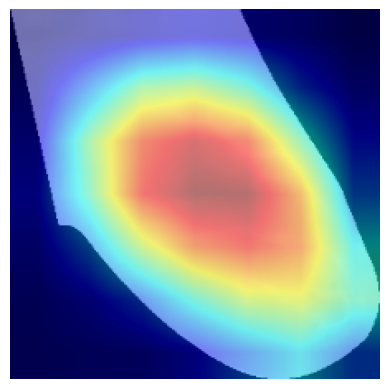

In [57]:
# Cargar y preparar la imagen
img = data[1][idx][0].numpy()
img = img / np.max(img)
img = np.float32(np.transpose(img, (1,2,0)))

# Llamar a la función con los parámetros adecuados
visualization = show_cam_on_image(img, grayscale_cam.squeeze(0), use_rgb=True)
plt.imshow(visualization)
plt.axis('off')
plt.show()

Model loaded successfully for inference
FOLD 2
-------------------------------


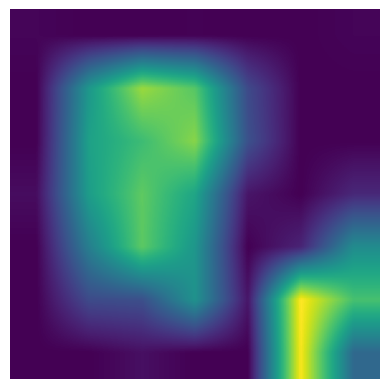

In [59]:
# Load the model status from checkpoint
model = resnet(n_channels=1, num_classes=1, fine_tune='full')  
checkpoint = torch.load('6vki4k57_resnet_64_class+conv1_001.pth', map_location=device, weights_only=True)
model.load_state_dict(checkpoint['model_state_dict'])
# model.load_state_dict(checkpoint)
for param in model.parameters():
    param.requires_grad = True
model = model.to(device)
model.eval()
print("Model loaded successfully for inference")

from make_dataset import get_data
from utils import make_transforms

transforms = make_transforms(True)
data = get_data(transform=make_transforms(False), normalize=True, slices=10, fold=2)

idx = 12

target_layers = [model.layer4[-1]] # una antes del GAP
# input_tensor = data[0][0][0].repeat(3, 1, 1).unsqueeze(0).to(device)
input_tensor = data[1][idx][0].unsqueeze(0).to(device)

# Construct the CAM object once, and then re-use it on many images:
# cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device.type == 'cuda')
cam = GradCAM(model=model, target_layers=target_layers)

# Define the target (if using BCE with a single output, just use 0)
# targets = [ClassifierOutputTarget(0)]
targets = None

# Generate the CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
plt.imshow(np.transpose(grayscale_cam, (1,2,0)))
plt.axis('off')
plt.show()

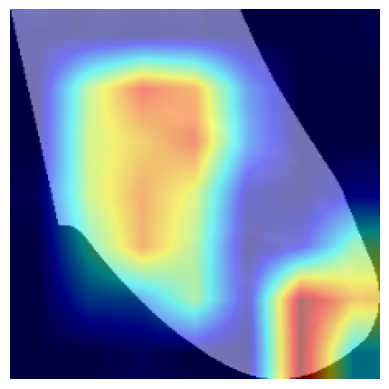

In [60]:
# Cargar y preparar la imagen
img = data[1][idx][0].numpy()
img = img / np.max(img)
img = np.float32(np.transpose(img, (1,2,0)))

# Llamar a la función con los parámetros adecuados
visualization = show_cam_on_image(img, grayscale_cam.squeeze(0), use_rgb=True)
plt.imshow(visualization)
plt.axis('off')
plt.show()